In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

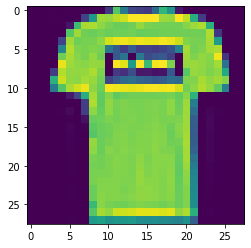

In [13]:
plt.imshow(train_images[1])


In [49]:
train_labels[0]

9

In [18]:
class_names[train_labels[1]]

'T-shirt/top'

In [47]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

train_labels_categorical = keras.utils.to_categorical(
    train_labels, num_classes=10, dtype='float32'
)

In [48]:
train_labels_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
def get_model(hidden_layers=1):
    layers = []
    layers.append(keras.layers.Flatten(input_shape = (28,28)))
    layers.append(keras.layers.Dense(3000,activation = 'relu'))
    layers.append(keras.layers.Dense(1000,activation = 'relu'))
    layers.append(keras.layers.Dense(10,activation = 'sigmoid'))
    
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [45]:
%%timeit -n1 -r1
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=1)

1875/1875 [==============================] - 96s 51ms/step - loss: 0.4698 - accuracy: 0.8299
1min 36s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
class_names[np.argmax(model.predict(test_images_scaled)[45])]

'Sneaker'

In [42]:
class_names[test_labels[45]]

'Sneaker'